In [7]:
import creating_baskets as cb
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Creating Baskets
market_baskets = cb.CreateBaskets()

In [9]:
#Making sure it works
#for item in market_baskets.values():
    #print(item)

In [10]:
#Creating a hash table that links the event to an integer
counter = 0
events_hash = {}


for events in market_baskets.values():
    for event in events:
        if event not in events_hash:
            events_hash[event] = counter
            counter += 1

print(events_hash)
# m = number of total events
#Will be used for later
m = len(events_hash)

{'mens1000free': 0, 'mens100free': 1, 'mens200free': 2, 'mens500free': 3, 'mens400IM': 4, 'mens50Free': 5, 'mens200fly': 6, 'mens200im': 7, 'mens200back': 8, 'mens100fly': 9, 'mens50back': 10, 'mens200breast': 11, 'mens100back': 12, 'mens100i': 13, 'mens50breast': 14, 'mens50fly': 15, 'mens100breast': 16, 'womens1000free': 17, 'womens100free': 18, 'womens200free': 19, 'womens500free': 20, 'womens200im': 21, 'womens400IM': 22, 'womens200back': 23, 'womens100fly': 24, 'womens200fly': 25, 'womens200breast': 26, 'womens100back': 27, 'womens50back': 28, 'womens100im': 29, 'womens50fly': 30, 'womens50breast': 31, 'womens50free': 32, 'womens100breast': 33}


In [11]:
#Calculating all event supports
event_supports = np.zeros(m)

for row in market_baskets.items():
    events = row[1]
    for event in events:
        event_supports[events_hash[event]] += 1

event_supports = event_supports/len(market_baskets)

#print(events_hash[0])

for i in range(len(event_supports)):
    print(i, event_supports[i])

0 0.022786458333333332
1 0.11848958333333333
2 0.11328125
3 0.041666666666666664
4 0.030598958333333332
5 0.1484375
6 0.039713541666666664
7 0.08919270833333333
8 0.03515625
9 0.107421875
10 0.12434895833333333
11 0.047526041666666664
12 0.10091145833333333
13 0.06380208333333333
14 0.10872395833333333
15 0.14778645833333334
16 0.09244791666666667
17 0.017578125
18 0.11848958333333333
19 0.09309895833333333
20 0.02734375
21 0.08919270833333333
22 0.044270833333333336
23 0.041015625
24 0.09049479166666667
25 0.024088541666666668
26 0.048177083333333336
27 0.09375
28 0.109375
29 0.09895833333333333
30 0.11979166666666667
31 0.10091145833333333
32 0.126953125
33 0.08984375


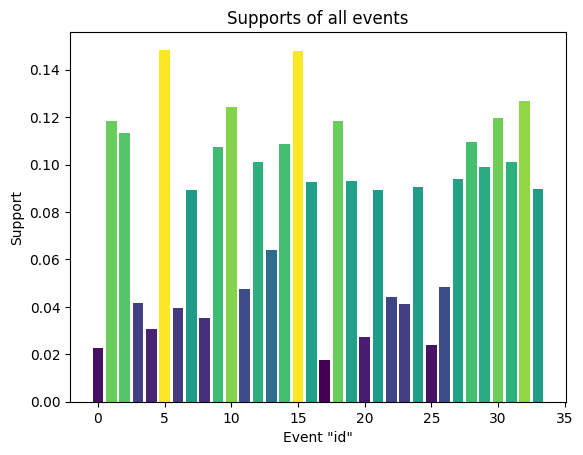

In [21]:
cmap = plt.cm.viridis
norm = plt.Normalize(min(event_supports), max(event_supports))

plt.bar(range(0,34), event_supports, color = cmap(norm(list(event_supports))))
plt.xlabel("Event \"id\"")
plt.ylabel("Support")
plt.title("Supports of all events")
plt.show()


In [ ]:
#Reverse event hash that will be used later, links the integer back to the event name
reverse_events_hash = {}
for i in range(m):
    for key, val in events_hash.items():
        if val == i:
            reverse_events_hash[i] = key

print(reverse_events_hash)

{0: 'mens1000free', 1: 'mens100free', 2: 'mens200free', 3: 'mens500free', 4: 'mens400IM', 5: 'mens50Free', 6: 'mens200fly', 7: 'mens200im', 8: 'mens200back', 9: 'mens100fly', 10: 'mens50back', 11: 'mens200breast', 12: 'mens100back', 13: 'mens100i', 14: 'mens50breast', 15: 'mens50fly', 16: 'mens100breast', 17: 'womens1000free', 18: 'womens100free', 19: 'womens200free', 20: 'womens500free', 21: 'womens200im', 22: 'womens400IM', 23: 'womens200back', 24: 'womens100fly', 25: 'womens200fly', 26: 'womens200breast', 27: 'womens100back', 28: 'womens50back', 29: 'womens100im', 30: 'womens50fly', 31: 'womens50breast', 32: 'womens50free', 33: 'womens100breast'}


[[ 0.  5. 22. ...  0.  0.  0.]
 [ 0.  0. 77. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. 25. 98.]
 [ 0.  0.  0. ...  0.  0. 14.]
 [ 0.  0.  0. ...  0.  0.  0.]]


Text(0.5, 1.0, 'Upper Triangular Pair Table')

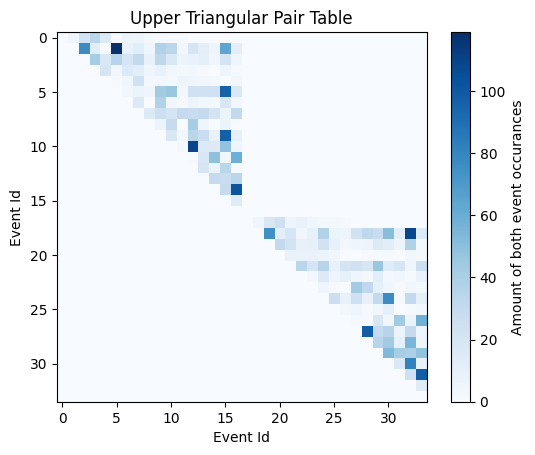

In [30]:
#Calculating pairs
pairs = {}
#Setting all possible pairs to 0 first, as this will aid us in computing the ideal meet schedule with distances.
#Upper Triangular
for i in range(m):
    for j in range(i+1, m):
        pairs[i,j] = 0

#Looking through all baskets and counting pairs
for basket in market_baskets.values():
    for i in range(len(basket)):
        for j in range(i + 1, len(basket)):
            e1 = events_hash[basket[i]]
            e2 = events_hash[basket[j]]

            if (e1 < e2):
                pairs[e1,e2] += 1
            else:
                pairs[e2,e1] += 1
#print(pairs)

#Ensuring that we have an upper triangular matrix
test_matrix = np.zeros((m,m))
for key, value in pairs.items():
    test_matrix[key[0], key[1]] = value
print(test_matrix)

plt.imshow(test_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar(label = "Amount of both event occurances")
plt.xlabel("Event Id")
plt.ylabel("Event Id")
plt.title("Upper Triangular Pair Table")

In [ ]:
#little test
max_pair = max(pairs, key = pairs.get)
first = max_pair[0]
second = max_pair[1]
print(reverse_events_hash[first], reverse_events_hash[second])

mens100free mens50Free


In [ ]:
# Getting most popular pairs
sorted_items = sorted(pairs.items(), key=lambda x: x[1], reverse=True)

# Take top n
top_n = sorted_items[:10]

for k, v in top_n:
    print(f"{reverse_events_hash[k[0]], reverse_events_hash[k[1]]}: {v}")

('mens100free', 'mens50Free'): 119
('mens50back', 'mens100back'): 109
('womens100free', 'womens50free'): 109
('mens50breast', 'mens100breast'): 102
('womens100back', 'womens50back'): 98
('womens50breast', 'womens100breast'): 98
('mens100fly', 'mens50fly'): 97
('mens50Free', 'mens50fly'): 96
('womens50fly', 'womens50free'): 81
('mens100free', 'mens200free'): 77


In [ ]:
bottom_n = sorted_items[:10]
for k, v in bottom_n:
    print(f"{reverse_events_hash[k[0]], reverse_events_hash[k[1]]}: {v}")

('mens100free', 'mens50Free'): 119
('mens50back', 'mens100back'): 109
('womens100free', 'womens50free'): 109
('mens50breast', 'mens100breast'): 102
('womens100back', 'womens50back'): 98
('womens50breast', 'womens100breast'): 98
('mens100fly', 'mens50fly'): 97
('mens50Free', 'mens50fly'): 96
('womens50fly', 'womens50free'): 81
('mens100free', 'mens200free'): 77


In [ ]:
print(events_hash["mens1000free"])
print(events_hash["mens500free"])
print(events_hash["mens200free"])
print(events_hash["mens100free"])
print(events_hash["mens50Free"])
print(events_hash["mens100breast"])
print(events_hash["mens200breast"])
print(events_hash["mens50Free"])

0
3
2
1
5
16
11
5


In [ ]:
test_array = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

#dist(i,j) = support(i,j) * 1/|pos(i) - pos(j)|
def dist(x1,x2, pos1, pos2): 
    if x1 < x2:
        return 1/np.abs(pos1 - pos2) * (pairs[x1,x2])
    else:
        return 1/np.abs(pos1 - pos2) * (pairs[x2,x1])

def calc_score(lineup):
    score = 0
    for i in range(len(lineup)):
        for j in range(i+1, len(lineup)):
            score += dist(lineup[i], lineup[j], i, j)
    return score

print(calc_score(test_array))

1750.2607004107006


In [ ]:
print(reverse_events_hash)

{0: 'mens1000free', 1: 'mens100free', 2: 'mens200free', 3: 'mens500free', 4: 'mens400IM', 5: 'mens50Free', 6: 'mens200fly', 7: 'mens200im', 8: 'mens200back', 9: 'mens100fly', 10: 'mens50back', 11: 'mens200breast', 12: 'mens100back', 13: 'mens100i', 14: 'mens50breast', 15: 'mens50fly', 16: 'mens100breast', 17: 'womens1000free', 18: 'womens100free', 19: 'womens200free', 20: 'womens500free', 21: 'womens200im', 22: 'womens400IM', 23: 'womens200back', 24: 'womens100fly', 25: 'womens200fly', 26: 'womens200breast', 27: 'womens100back', 28: 'womens50back', 29: 'womens100im', 30: 'womens50fly', 31: 'womens50breast', 32: 'womens50free', 33: 'womens100breast'}


In [ ]:
#CCS meet schedule (must just one day)
ccs_meet_schedule = [22, 4, 23, 8, 25, 6, 26, 11, 30, 15,21 , 7, 32, 5, 16, 33, 19, 2, 27, 12, 17, 0, 28, 10, 24, 9, 31, 14, 18, 1, 29, 13, 20, 3]
print(calc_score(ccs_meet_schedule))

634.7363903038826


In [ ]:
max_score = 1000000
best_schedule = []
for i in range(100000):
    random_schedule = np.random.choice(test_array, size = 34, replace = False)
    score = calc_score(random_schedule)
    if (score < max_score):
        max_score = score
        best_schedule = random_schedule

print("max score of:", max_score)
print(best_schedule)

max score of: 620.6867667411166
[11  6 15  3 30 12 19 26 28 20  5  7 23 33 17  8  4 29 22 13 25  1 27 16
 32  9 24  0 31 14 21  2 18 10]


In [ ]:
#Adjusting to account for it being a multi-day meet
ccs_day1 = [22, 4, 23, 8, 25, 6, 26, 11]
ccs_day2 = [30, 15,21 , 7, 32, 5, 16, 33, 19, 2, 27, 12, 17, 0]
ccs_day3 = [28, 10, 24, 9, 31, 14, 18, 1, 29, 13, 20, 3]

schedule = [ccs_day1, ccs_day2, ccs_day3]
scores = [calc_score(day) for day in schedule]


total_score = sum(scores)
print("Total score after separating into 3 day meet schedule")
print(total_score)

Total score after separating into 3 day meet schedule
316.08571428571423


Now Need to find a way to calculate minimum meet schedule, or atleast approximate it.

Generate (random) meet schedule, find all cuts of it, calc score?

Could put some restrictions to make easier (Keep all timed finals on that friday, 1000 free at end of sat, etc.)

In [ ]:
print(reverse_events_hash)

{0: 'mens1000free', 1: 'mens100free', 2: 'mens200free', 3: 'mens500free', 4: 'mens400IM', 5: 'mens50Free', 6: 'mens200fly', 7: 'mens200im', 8: 'mens200back', 9: 'mens100fly', 10: 'mens50back', 11: 'mens200breast', 12: 'mens100back', 13: 'mens100i', 14: 'mens50breast', 15: 'mens50fly', 16: 'mens100breast', 17: 'womens1000free', 18: 'womens100free', 19: 'womens200free', 20: 'womens500free', 21: 'womens200im', 22: 'womens400IM', 23: 'womens200back', 24: 'womens100fly', 25: 'womens200fly', 26: 'womens200breast', 27: 'womens100back', 28: 'womens50back', 29: 'womens100im', 30: 'womens50fly', 31: 'womens50breast', 32: 'womens50free', 33: 'womens100breast'}


In [ ]:
'''
Investigating scores of other swim formats
'''

#NCAA
ncaa_day1 = [20, 3, 21, 7, 32, 5]
ncaa_day2 = [9, 24, 4, 22, 19, 2, 33, 16, 27, 12]
ncaa_day3 = [17, 0, 23, 8, 18, 1, 26, 11, 25, 6]

ncaa_schedule = [ncaa_day1, ncaa_day2, ncaa_day3]
ncaa_scores = [calc_score(day) for day in ncaa_schedule]


ncaa_total_score = sum(ncaa_scores)
print("Total score after separating into 3 day meet schedule")
print(ncaa_total_score)

Total score after separating into 3 day meet schedule
107.01706349206349


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

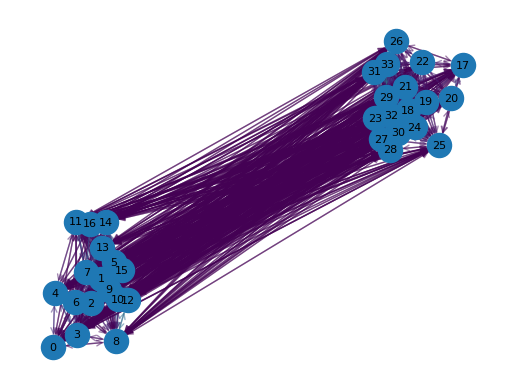

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Example 34x34 matrix
matrix = np.random.rand(34, 34)  # Replace with your real matrix

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(34):
    G.add_node(i)

# Add weighted edges
for i in range(34):
    for j in range(34):
        if i != j:  # Optional: skip self-loops if you don't want arrows pointing to itself
            if (i < j):
                G.add_edge(i, j, weight = test_matrix[i, j])
            else:
                G.add_edge(i, j, weight = test_matrix[j, i])

# Set positions (you can customize layout: spring_layout, circular_layout, etc.)
pos = nx.spring_layout(G, seed=42)  # or try nx.circular_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# Draw edges with transparency based on weight
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    arrowstyle='->',
    arrowsize=10,
    edge_color=weights,
    #edge_cmap=plt.cm.plasma,  # Color map (choose your favorite)
    width=1,
    alpha = 0.5
)

# Draw labels (optional)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Edge Weight Intensity")
plt.show()
